### Lucas Leal Vale

### Pergunta: Como o acesso a internet influência no desenvolvimento do IDH ?

## Introdução
### Estamos em contato com a internet o tempo todo no nosso dia a dia e apesar de ser um advento super recente já não conseguimos imaginar as nossas vidas sem este meio de comunicação, tão pratico. Porém, se voltarmos um pouco no tempo cerca de 25 anos praticamente apenas os computadores estavam no cenário, e eles não eram nada acessiveis.
### Poucos eram os países que tinham acesso e dentro desses países apenas as grandes empresas detinham as máquinas que do nosso ponto de vista atual eram relativamente rudimentares.
### O tempo foi passando, o acesso às maquinas foi aumentando e com o andar da carroagem a internet tambem se tornou algo super banal. E inclusive graças a ela podemos pesquisar, estudar, trabalhar e gerar empregos com ela. Por isso acredito que os paises que investiram em infraesturura de suas malhas de redes e ao acesso da internet tivaram um crescimento economico ainda mais destacado do que aqueles que permaneceram defasados tecnologicamente.
### E esse será o foco deste projeto.

### Pergunta: Como o acesso a internet influencia no desenvolvimento do IDH ?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

#### Lendo os dataframes

In [2]:
Pc = pd.read_excel('personal_computers_per_100_people.xlsx')
Idh = pd.read_excel('Indicator_HDI.xlsx')
Int = pd.read_excel('internet_users.xlsx')

#### Visualizando os dataframes que serao utilizados

In [3]:
#Pc.head()

In [4]:
#Int.head()

In [5]:
#Idh.head()

#### Reindexando os dataframes para evitar erros devido ao index numerico

In [6]:
Pc_idx = Pc.set_index('geo')
Idh_idx = Idh.set_index('HDI')
Int_idx = Int.set_index('geo')

#### Adicionando sufixo nas colunas para que nao haja colisao durante a juncao dos dataframes

In [7]:
Idh_idx = Idh_idx.add_suffix('_IDH')
Pc_idx = Pc_idx.add_suffix('_Pc')
Int_idx = Int_idx.add_suffix('_Int')

#### Juntando os dataframes em um unico, note que juntei os tres usando o dataframe de IDH como base.

In [8]:
Idh_idx = Idh_idx.join(Int_idx, how="inner")

In [9]:
df=Idh_idx.join(Pc_idx, how="inner")

In [10]:
df.index.name = 'geo'

In [11]:
df.head()


,1980_IDH,1990_IDH,2000_IDH,2005_IDH,2006_IDH,2007_IDH,2008_IDH,2009_IDH,2011_IDH,1960_Int,...,1997_Pc,1998_Pc,1999_Pc,2000_Pc,2001_Pc,2002_Pc,2003_Pc,2004_Pc,2005_Pc,2006_Pc
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28,0.32
Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739,NaN,...,0.32,0.49,0.65,0.82,0.98,1.17,1.36,1.54,1.73,3.81
Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698,NaN,...,0.48,0.54,0.60,0.66,0.71,0.77,0.83,0.90,1.07,NaN
Angola,NaN,NaN,0.384,0.445,0.459,0.471,0.476,0.481,0.486,NaN,...,0.06,0.08,0.09,0.11,0.12,0.18,NaN,NaN,0.59,0.70
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.764,NaN,...,NaN,NaN,NaN,NaN,10.30,11.40,12.60,13.70,14.80,21.20


### Agora que os dados de interesse já estão prontos para ser estudaos, irei começar com a análise de alguns anos com certo espaçamento temporal entre si. Contudo, essa distância não foi homogenea devido ao Dataframe de computadores que só foi atualizado até o ano de 2006 e ao dataframe de IDH não possuir dados para o ano de 2010. Por isso neste projeto as variáveis cruzadas irão até o ano de 2006, para maior precisão dos resultado.

### Primeiramente é de suma importância mostrar algumas coisas sobre o panorâma geral dos IDHs ao longo dos anos, pois alguns desses dados serão úteis mais para frente.

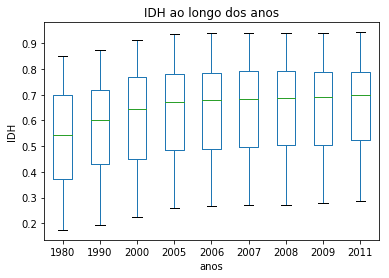

In [12]:
Idh.plot.box()
plt.title('IDH ao longo dos anos')
plt.xlabel('anos')
plt.ylabel('IDH')
plt.show()

### O gráfico acima tem como finalidade evidenciar que o IDH global, ao decorrer dos anos vem melhorando em muitos aspectos tais como uma crescente em média, mediana e valor máximo, além do valor minímo ter reduzido.

### Para tornar a afirmação feita acima mais palpável, abaixo se encontram os valores numéricos dessa evolução que ocorrou no Índice de Desenvolvimento Humano, dentro dos anos alvos deste projeto.

In [13]:
Idh[1990].describe()

count    123.000000
mean       0.577976
std        0.181790
min        0.193000
25%        0.431000
50%        0.600000
75%        0.719000
max        0.873000
Name: 1990, dtype: float64

In [14]:
Idh[2000].describe()

count    153.000000
mean       0.615124
std        0.185600
min        0.224000
25%        0.448000
50%        0.643000
75%        0.770000
max        0.913000
Name: 2000, dtype: float64

In [15]:
Idh[2006].describe()

count    174.000000
mean       0.642121
std        0.179414
min        0.266000
25%        0.489500
50%        0.678000
75%        0.783750
max        0.940000
Name: 2006, dtype: float64

### Os histogramas abaixo servirão como um suporte e embasamento deste projeto. Eles representam a existêcia de um computador a cada 100 (cem) pessoas. 

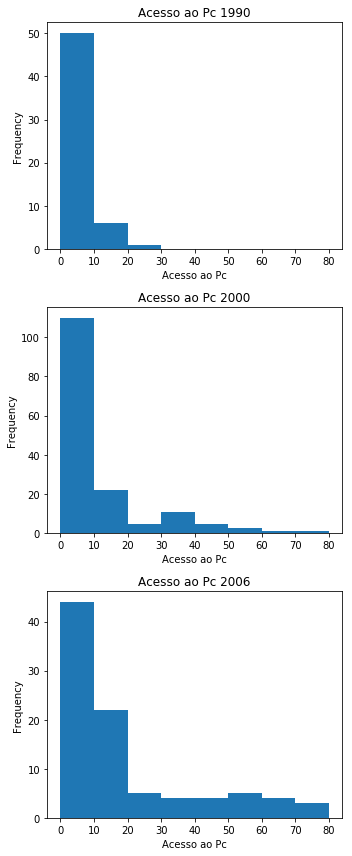

In [16]:
fig = plt.figure(figsize=(5,12))
faixas=range(0,90,10)
plt.subplot(311)
df['1990_Pc'].plot.hist(bins=faixas)
plt.xlabel('Acesso ao Pc')
plt.title('Acesso ao Pc 1990')

plt.subplot(312)
df['2000_Pc'].plot.hist(bins=faixas)
plt.xlabel('Acesso ao Pc')
plt.title('Acesso ao Pc 2000')

plt.subplot(313)
df['2006_Pc'].plot.hist(bins=faixas)
plt.xlabel('Acesso ao Pc')
plt.title('Acesso ao Pc 2006')
plt.tight_layout()
plt.show()

### Sobre estas distribuições pode se afirmar que ao longo dos anos o acesso ao computador se tornou cada vez mais viável e dissiminado pelo globo. Sendo que em 2006, boa parte dos países já possuiam mais de 40 computadores para cada 100 pessoas.

### Em seguida, temos os histogramas que revelam a distribuição do acesso à internet, ao longo dos anos de observação.

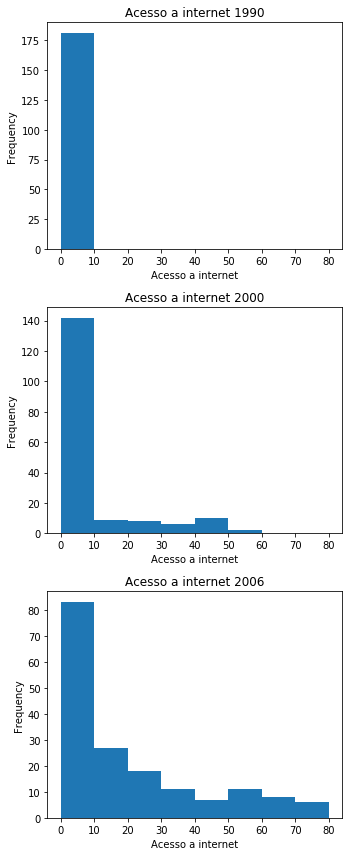

In [17]:
fig = plt.figure(figsize=(5,12))

plt.subplot(311)
df['1990_Int'].plot.hist(bins=faixas)
plt.xlabel('Acesso a internet')
plt.title('Acesso a internet 1990')

plt.subplot(312)
df['2000_Int'].plot.hist(bins=faixas)
plt.xlabel('Acesso a internet')
plt.title('Acesso a internet 2000')

plt.subplot(313)
df['2006_Int'].plot.hist(bins=faixas)
plt.xlabel('Acesso a internet')
plt.title('Acesso a internet 2006')

plt.tight_layout()
plt.show()

### Como de se esperar os dados obtidos sobre o acesso a internet apenas começaram a ficar interessantes apartir de 2006, antes disso ou a segregação da internet era simplesmente absurda, como em 2000, ou se quer existia a internet, tal que 1990.
### E mesmo assim em 2006, apenas poucos países possuiam mais do que 40% de sua população ativa na internet como indica o histograma abaixo. Ou seja, ainda a grande maioria possuia mais de 60% da sua população sem acesso a rede. 
### Isso talvez nos indique que apenas os países desenvolvidos e consequentemente de IDH alto, são os que desde 2006 possuiam grande parte de sua população canectada.
### Entretanto ainda é muito cedo na análise para poder afirmar isso.

### Para visualisar se os países de IDH alto são os países que possuem a maior dissiminação da internet em seu território, ou seja, se estão correlacionados. Será necessario o uso de um outro ferramental, aplicado logo em seguida.

###### A função a seguir tem por objetivo complementar o gráfico de disperção com uma reta, que ajuda na visualização de uma possivel correlação entre as variaveis testadas

In [18]:
#Funcao extraida do site 'https://pastebin.com/0KcDyqKq', disponibilizado no blackboard pelos professores. Acesso 9h18 21/8/2018
def reta(dados_x, dados_y,titulo,eixox,eixoy):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(titulo)
    plt.xlabel(eixox)
    plt.ylabel(eixoy)
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

### Já que os histogramas não eram suficientes para revelar se o advindo da internet influênciou no IDH e vice e versa, foram feitos alguns plots para evidenciar essa correlação entre os anos com certo distanceamento mencionados a cima.
### Relembrando a suposição inicial, de que a internet talvez seja um dos influenciadores indiretos do IDH e portanto os computadores devem ter feito o mesmo, porém um pouco antes do advindo da internet.
### Por isso, as primeiras correlações que serão apresentadas são entre computadores e IDH.
### Seguem os gráficos:

####  Analisando a correlação pelo uso de gráficos de dispersão e dos respectivos coeficientes de correlação

Scatter Plot 1

Ajuste linear entre X3 e X4:
Coeficiente linear: -5.029231308513229
Coeficiente angular: 14.790211439469818


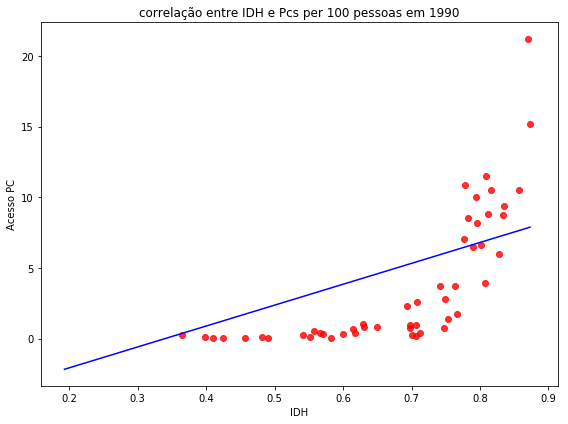

O coeficiente de correlacao entre o acesso aos computadores e o Idh é de 0.7265966620427668. 


In [19]:
print('Scatter Plot 1')
print('')
reta(df["1990_IDH"],df['1990_Pc'],('correlação entre IDH e Pcs per 100 pessoas em 1990'),('IDH'),('Acesso PC'))
f=df["1990_IDH"].corr(df["1990_Pc"])
print("O coeficiente de correlacao entre o acesso aos computadores e o Idh é de {0}. ".format(f))

Scatter Plot 2

Ajuste linear entre X3 e X4:
Coeficiente linear: -25.1659452140145
Coeficiente angular: 57.160665336513226


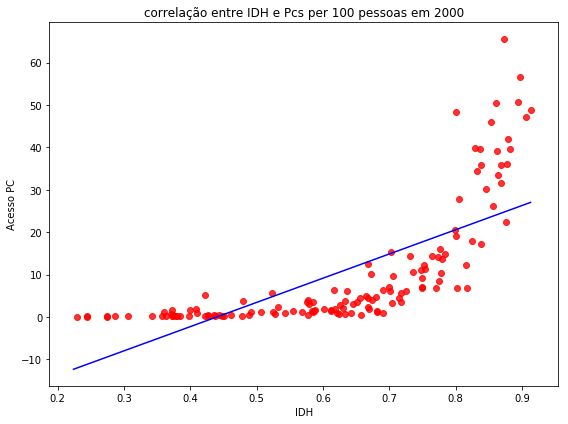

O coeficiente de correlacao entre o acesso aos computadores e o Idh é de 0.7239000743275265. 


In [20]:
print('Scatter Plot 2')
print('')
reta(df["2000_IDH"],df['2000_Pc'],('correlação entre IDH e Pcs per 100 pessoas em 2000'),('IDH'),('Acesso PC'))
e=df["2000_IDH"].corr(df["2000_Pc"])
print("O coeficiente de correlacao entre o acesso aos computadores e o Idh é de {0}. ".format(e))

Scatter Plot 3

Ajuste linear entre X3 e X4:
Coeficiente linear: -44.68608260938624
Coeficiente angular: 104.59815216211504


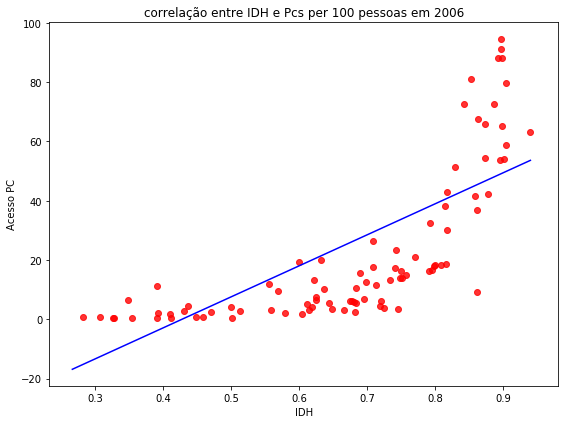

O coeficiente de correlacao entre o acesso aos computadores e o Idh é de 0.7308679530613986. 


In [21]:
print('Scatter Plot 3')
print('')
reta(df["2006_IDH"],df['2006_Pc'],('correlação entre IDH e Pcs per 100 pessoas em 2006'),('IDH'),('Acesso PC'))
d=df["2006_IDH"].corr(df["2006_Pc"])
print("O coeficiente de correlacao entre o acesso aos computadores e o Idh é de {0}. ".format(d))

### Ao analisar os gráficos obtidos e o seus respectivos coeficientes de correlação é possivel se dizer que existe uma certa correlação entre os dados, porém com pouquíssimo avanço nesse mesmo coeficiente. Ou seja, apesar dos computadores terem se tornado mais presentes até 2006, esse aumento não foi o suficiente para justificar o aumento ou decréssimo dos IDH.

### Os próximos gráficos de dispersão estão relacionados com a influência que as variáveis internet e IDH têm entre si.
### Novamente, seguem os gráficos:

Scatter Plot 4

Ajuste linear entre X3 e X4:
Coeficiente linear: -0.1655006884211743
Coeficiente angular: 0.3338356065860652


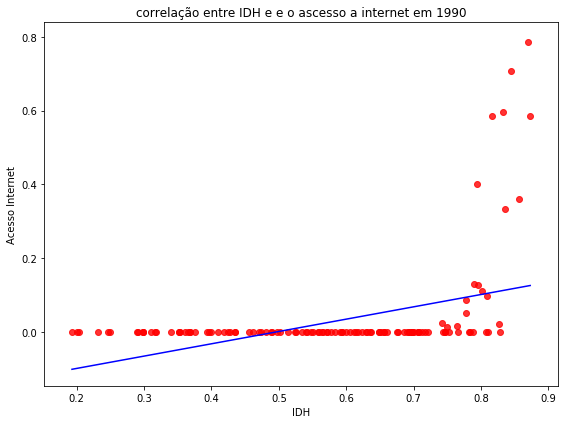

O coeficiente de correlacao entre o acesso a internet e o Idh é de 0.4229207586227928. 


In [22]:
print('Scatter Plot 4')
print('')
reta(df["1990_IDH"],df['1990_Int'],('correlação entre IDH e e o ascesso a internet em 1990'),('IDH'),('Acesso Internet'))
c=df["1990_IDH"].corr(df["1990_Int"])
print("O coeficiente de correlacao entre o acesso a internet e o Idh é de {0}. ".format(c))

Scatter Plot 5

Ajuste linear entre X3 e X4:
Coeficiente linear: -23.971375970260155
Coeficiente angular: 51.78012016768959


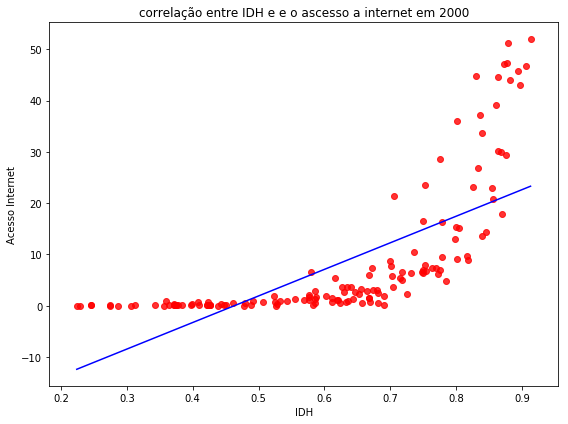

O coeficiente de correlacao entre o acesso a internet e o Idh é de 0.7063970496916342. 


In [23]:
print('Scatter Plot 5')
print('')

reta(df["2000_IDH"],df['2000_Int'],('correlação entre IDH e e o ascesso a internet em 2000'),('IDH'),('Acesso Internet'))
b=df["2000_IDH"].corr(df["2000_Int"])
print("O coeficiente de correlacao entre o acesso a internet e o Idh é de {0}. ".format(b))

Scatter Plot 6

Ajuste linear entre X3 e X4:
Coeficiente linear: -49.22910473264113
Coeficiente angular: 110.8027530226474


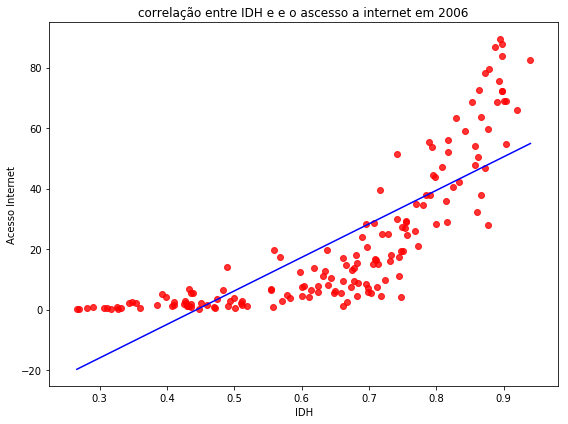

O coeficiente de correlacao entre o acesso a internet e o Idh é de 0.8060310768893242. 


In [24]:
print('Scatter Plot 6')
print('')
reta(df["2006_IDH"],df['2006_Int'],('correlação entre IDH e e o ascesso a internet em 2006'),('IDH'),('Acesso Internet'))
a=df["2006_IDH"].corr(df["2006_Int"])
print("O coeficiente de correlacao entre o acesso a internet e o Idh é de {0}. ".format(a))

### Mas desta vez, se os computadores não foram anteriormente capazes de explicar uma possivel associação entre eles e o IDH, a internet veio pra quebrar isso e mostrar que ela sim está ligada ao IDH, mais especificamente ao PIB. Como explica Eduardo Finzi em seu artigo "Internet e PIB: como essa relação potencializa o IDH dos países", no mesmo o autor destaca a internet como grande agente da movimentação da econômia mundial e grande influênciador do PIB de diversos países ao redor do globo (http://blog.cedrotech.com/internet-e-pib-como-essa-relacao-potencializa-o-idh-dos-paises/ , acesso 22/08/2018). 
### Voltando para os gráficos, apesar do Scatter Plot 4 ser um fracasso correlativo, isso pode ser explicado pela ausência da internet em 1990,  a sua permanêcia do mesmo, no projeto, é proposital para evidenciar os gráficos que vem logo em seguida.
### De acordo com os Scatter Plots 5 e 6 a correlação entre as variáveis apenas aumentou com o aumento da internet, assim como o IDH tbm melhorou muito seus indices ao longo desses anos estudados.
### Logo, com a análise feita até então é possivel se dizer que a internet influênciou de maneira possitiva e crescente boa parte dos IDHs do globo.
### A falta de dados mais recentes sobre a quantidade de PCs impossibilitou uma análise mais recente do comportamento dessas variáveis. Apenas a efeito de curiosidade, abaixo se encontra um histograma do acesso à internet de 2016.
### O gráfico revela um comportamento totalmente diferente do observado até então, nele a internet em apenas dez anos cresceu de maneira surpreendente.
### Resultado que poderia trazer um novo panorama para este projeto ou até então garantir uma continuação do mesmo, caso os dados sobre computator sejam atualizados.

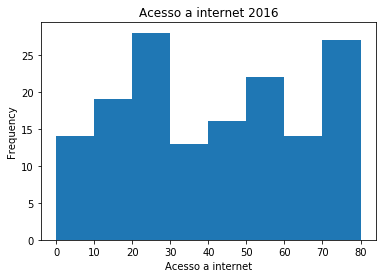

In [25]:
#CURIOSIDADE
df['2016_Int'].plot.hist(bins=faixas)
plt.xlabel('Acesso a internet')
plt.title('Acesso a internet 2016')
plt.show()
